In [458]:
import pandas as pd
import numpy as np
titanic = pd.read_excel('Titanic.xlsx', sheet_name="Retrieve Titanic")

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1307 entries, 0 to 1306
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Name                                1307 non-null   object 
 1   Passenger Class                     1307 non-null   object 
 2   Sex                                 1307 non-null   object 
 3   Age                                 1044 non-null   float64
 4   No of Siblings or Spouses on Board  1307 non-null   int64  
 5   No of Parents or Children on Board  1307 non-null   int64  
 6   Passenger Fare                      1306 non-null   float64
 7   Port of Embarkation                 1305 non-null   object 
 8   Life Boat                           486 non-null    object 
 9   Survived                            1307 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 102.2+ KB


## Descripcion
La base cargada tiene 1307 registros y debemos cambiar las columnas que tienen Dtype objetc (tipicamente cadenas o caracteres)

Name                                object    
Passenger Class                     object     
Sex                                 object     
Port of Embarkation                 object     
Life Boat                           object     
Survived                            object     

Además, identificamos las columnas con valores nan


In [459]:
# obteniendo las columnas con valores nulos
titanic.isnull().sum()


Name                                    0
Passenger Class                         0
Sex                                     0
Age                                   263
No of Siblings or Spouses on Board      0
No of Parents or Children on Board      0
Passenger Fare                          1
Port of Embarkation                     2
Life Boat                             821
Survived                                0
dtype: int64

## Corroborar que no existan registros repetidos
### titanic.duplicated().sum()
0 registros repetidos

## revisamos la proporcion de Life Boat nulos, para determinar si eliminar
### titanic['Life Boat'].isnull().sum()/len(titanic)     
62.81 % de los registros son nulos     
ELIMINARE PORQUE TIENE MUCHOS DATOS PERDIDOS


In [460]:
titanic.drop(['Name','Life Boat'], axis = 1, inplace=True)

## Tratando las demas variables 

In [461]:
# paso clase de pasajero y sexo a numero
titanic["Passenger Class"].unique()
titanic['Passenger Class'].replace(['First','Second','Third'],[1,2,3],inplace=True)

titanic['Sex'].unique()
titanic['Sex'].replace(['Female','Male'],[0,1],inplace=True)

titanic["Survived"].unique()
titanic["Survived"].replace(['Yes', 'No'],[1,0],inplace=True)


titanic.head()


,Passenger Class,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Passenger Fare,Port of Embarkation,Survived
0,1,0,29.0000,0,0,211.3375,Southampton,1
1,1,1,0.9167,1,2,151.5500,Southampton,1
2,1,0,2.0000,1,2,151.5500,Southampton,0
3,1,1,30.0000,1,2,151.5500,Southampton,0
4,1,0,25.0000,1,2,151.5500,Southampton,0


In [462]:
titanic[ titanic['Passenger Fare'].isna() ]

,Passenger Class,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Passenger Fare,Port of Embarkation,Survived
1223,3,1,60.5,0,0,NaN,Southampton,0


## solo existe una tarifa promedio nula, revisando...
tarifa_promedio = titanic["Passenger Fare"].mean() nos da 33.33   
pero no deberia reemplazar directamente por el promedio ya que la tercera clase es mucho menor   
entonces, se calcula la tarifa promedio de la tercera clase y esta reemplaza el nan

In [463]:
tercera_clase = titanic[ titanic["Passenger Class"] == 3 ]
tarifa_promedio_tercera = tercera_clase['Passenger Fare'].mean()

titanic['Passenger Fare'] = titanic['Passenger Fare'].replace(np.nan, tarifa_promedio_tercera)
print( "Tarifa promedio tercera clase "+str(tarifa_promedio_tercera) )



Tarifa promedio tercera clase 13.318365439093483


## Analisis para puerto de embarque

Tenemos dos registros nulos, los cuales no deseo eliminar pues pueden ser importantes condiserando que ambos sobrevivieron 


In [464]:
titanic[ titanic['Port of Embarkation'].isna() ]

,Passenger Class,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Passenger Fare,Port of Embarkation,Survived
168,1,0,38.0,0,0,80.0,NaN,1
284,1,0,62.0,0,0,80.0,NaN,1


## ambos nan son sobrevivientes, ambos de primera clase

### cantidad de pasajeros que embarcados por cada puerto
'Southampton' = 177, 'Cherbourg' = 141, nan =2, 'Queenstown'=3

Para mantener logica en los datos, los nan deberian ser reemplazados por Southampton o Cherbourg (1 o 2)


In [465]:
import random

#primera_clase = titanic[ titanic["Passenger Class"] == 1 ]
#primera_clase["Port of Embarkation"].unique()

puertos = ["Southampton", "Cherbourg", "Queenstown"]
titanic["Port of Embarkation"] = titanic["Port of Embarkation"].replace(np.nan, puertos[ random.randint(0,1) ] )

titanic["Port of Embarkation"].unique()


array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [466]:
titanic = pd.get_dummies(titanic, columns=["Port of Embarkation"])
titanic.head()

,Passenger Class,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Passenger Fare,Survived,Port of Embarkation_Cherbourg,Port of Embarkation_Queenstown,Port of Embarkation_Southampton
0,1,0,29.0000,0,0,211.3375,1,0,0,1
1,1,1,0.9167,1,2,151.5500,1,0,0,1
2,1,0,2.0000,1,2,151.5500,0,0,0,1
3,1,1,30.0000,1,2,151.5500,0,0,0,1
4,1,0,25.0000,1,2,151.5500,0,0,0,1


In [467]:
# remplazo edades nulas 
# imputación de datos perdidos, para este caso (Age) utilizo imputación del vecino más cercano

#edad_promedio = titanic["Age"].mean()
#titanic['Age'] = titanic['Age'].replace(np.nan, edad_promedio)

from sklearn.impute import KNNImputer

imputer = KNNImputer() # n_neighbors=3
imputed = imputer.fit_transform(titanic)
titanic = pd.DataFrame(imputed, columns=titanic.columns)

titanic["Age"].describe()

count    1307.000000
mean       30.036432
std        13.403329
min         0.166700
25%        21.000000
50%        28.500000
75%        38.000000
max        80.000000
Name: Age, dtype: float64

## Corroboramos que no existan valores nulos y todos los datos numericos

In [468]:
#titanic = titanic.dropna(subset=["Age"])
titanic.isnull().sum()



Passenger Class                       0
Sex                                   0
Age                                   0
No of Siblings or Spouses on Board    0
No of Parents or Children on Board    0
Passenger Fare                        0
Survived                              0
Port of Embarkation_Cherbourg         0
Port of Embarkation_Queenstown        0
Port of Embarkation_Southampton       0
dtype: int64

## Ahora podemos comenzar con determinar el numero de cluster

Primero, normalizamos los datos, todos entre 0 y 1

In [469]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit( titanic )
titanic_norm = scaler.transform(titanic)

titanic_norm = pd.DataFrame(titanic_norm)
titanic_norm.describe()

,0,1,2,3,4,5,6,7,8,9
count,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000
mean,0.646901,0.644223,0.374151,0.062452,0.042846,0.065035,0.382555,0.208110,0.093344,0.698546
std,0.419011,0.478931,0.167891,0.130284,0.096232,0.101052,0.486197,0.406111,0.291025,0.459065
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.260960,0.000000,0.000000,0.015412,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.354906,0.000000,0.000000,0.028213,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.473904,0.125000,0.000000,0.061045,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [470]:
from sklearn.cluster import KMeans

MAX_K = 20
SSW = []
SSW_ = []

# para titanic normalizado
for c in range(1,MAX_K):
    km_c = KMeans(n_clusters=c, n_init=25).fit(titanic_norm)
    # distancia intercluster
    SSW.append( km_c.inertia_ )

# para titanic sin normalizar
for c in range(1, MAX_K):
    km_c = KMeans(n_clusters=c, n_init=25).fit(titanic)
    # distancia intercluster
    SSW_.append( km_c.inertia_ )
SSW

[1523.225997401642,
 1076.0375425518782,
 804.3801330773168,
 623.2141733612116,
 519.8639582260811,
 437.8672815870801,
 362.54854219811375,
 302.73573828878483,
 263.7461636969201,
 228.20562937331206,
 205.21881598142423,
 183.41435114672726,
 163.7313143744761,
 146.78466204987322,
 133.73098047728658,
 122.08654262208448,
 108.83186417121036,
 100.60141827208453,
 92.23860449098103]

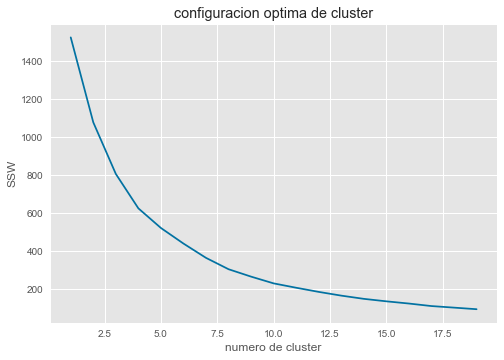

In [471]:
import matplotlib.pyplot as plot
plot.plot( range(1,MAX_K), SSW, "bx-" )
plot.xlabel("numero de cluster")
plot.ylabel("SSW")
plot.title("configuracion optima de cluster")
plot.style.use("ggplot")
plot.show()

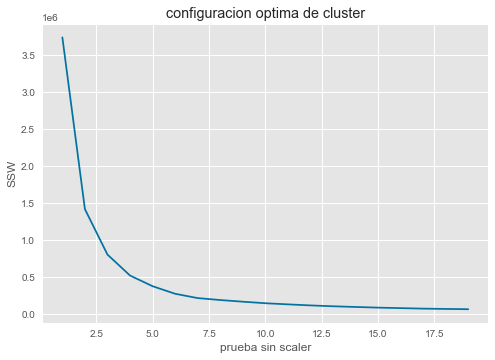

In [472]:
plot.plot( range(1,MAX_K), SSW_, "bx-" )
plot.xlabel("prueba sin scaler")
plot.ylabel("SSW")
plot.title("configuracion optima de cluster")
plot.style.use("ggplot")
plot.show()

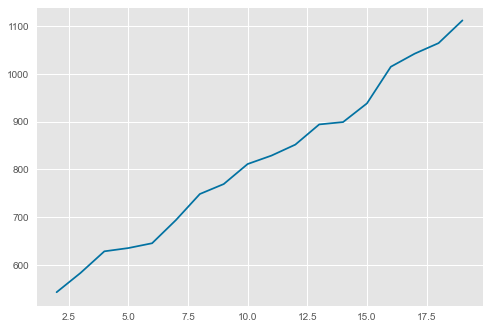

In [473]:
from sklearn import metrics
from sklearn.metrics import calinski_harabasz_score

ch = []
for i in range(2,MAX_K):
    km_ = KMeans(n_clusters=i, n_init=25).fit(titanic_norm)
    ch_ = calinski_harabasz_score(titanic_norm, km_.labels_ )
    ch.append( ch_ )
ch

plot.plot( range(2,MAX_K), ch, "bx-" )

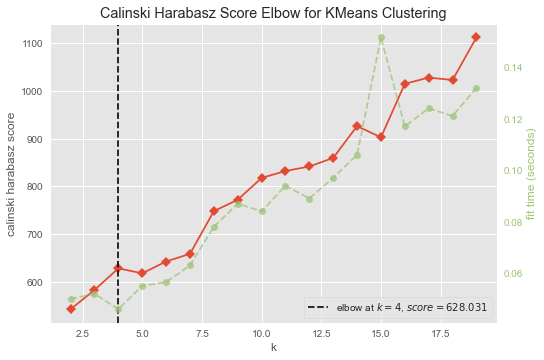

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [474]:
#Apoyandome en la libreria yellowbrick

from yellowbrick.cluster import KElbowVisualizer

# relación de dispersión entre y dentro de los conglomerados
# muestra la cantidad de tiempo para entrenar el modelo de agrupamiento por K como una línea verde

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,MAX_K), metric='calinski_harabasz', timings=True)

visualizer.fit(titanic_norm)
visualizer.show()

## Resultado
Luego de graficar SSW para titanic normalizado y sin normalizar    
Noto que dejo de disminuir de manera "drastica" a partir del cluster 4

In [475]:
# SUPUESTO definimos que el optimo es 4
km = KMeans(n_clusters=4, n_init=25).fit(titanic_norm)
centros = pd.DataFrame( km.cluster_centers_ )
# cada numero representa un centroide, por cada cluster
# (centroide es promedio de un grupo)
centros.columns = titanic.columns
centros



,Passenger Class,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Passenger Fare,Survived,Port of Embarkation_Cherbourg,Port of Embarkation_Queenstown,Port of Embarkation_Southampton
0,0.600756,0.267003,0.345846,0.085957,0.074167,0.070507,7.657431e-01,-1.387779e-16,8.326673e-17,1.000000e+00
1,0.729651,1.000000,0.388861,0.055717,0.026916,0.040467,-3.330669e-16,-8.326673e-17,1.387779e-16,1.000000e+00
2,0.422794,0.577206,0.391808,0.049632,0.040850,0.121926,5.588235e-01,1.000000e+00,1.526557e-16,8.881784e-16
3,0.946721,0.516393,0.364680,0.043033,0.012750,0.024297,3.606557e-01,2.775558e-17,1.000000e+00,-4.440892e-16


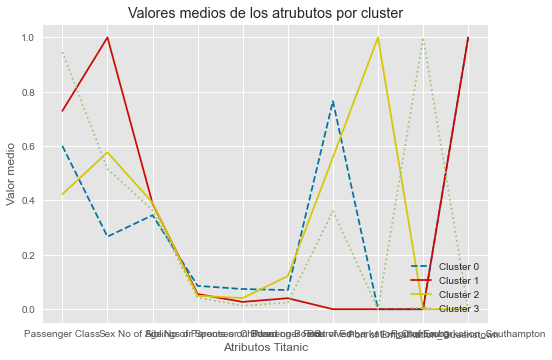

In [476]:
plot.plot(centros.columns, centros.iloc[0],"b", label="Cluster 0", linestyle="--")
plot.plot(centros.columns, centros.iloc[1],"r", label="Cluster 1")
plot.plot(centros.columns, centros.iloc[2],"y", label="Cluster 2")
plot.plot(centros.columns, centros.iloc[3],"g",linestyle=":", label="Cluster 3")


plot.legend(loc="lower right")
plot.ylabel("Valor medio")
plot.xlabel("Atributos Titanic")
plot.title("Valores medios de los atrubutos por cluster")
plot.show()

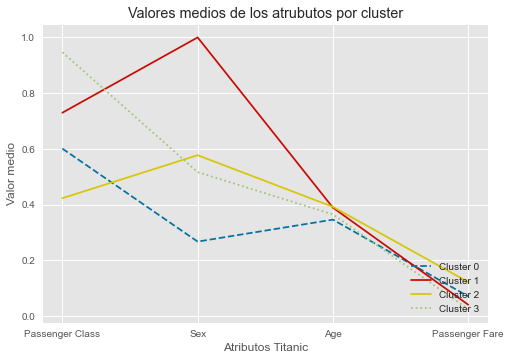

In [484]:
# Grafico solo los centroides de las variables
# Passenger Class	Sex	Age	y Passenger Fare	
c = centros.iloc[:,[0,1,2,5]]

plot.plot(c.columns, c.iloc[0],"b", label="Cluster 0", linestyle="--")
plot.plot(c.columns, c.iloc[1],"r", label="Cluster 1")
plot.plot(c.columns, c.iloc[2],"y", label="Cluster 2")
plot.plot(c.columns, c.iloc[3],"g",linestyle=":", label="Cluster 3")


plot.legend(loc="lower right")
plot.ylabel("Valor medio")
plot.xlabel("Atributos Titanic")
plot.title("Valores medios de los atrubutos por cluster")
plot.show()

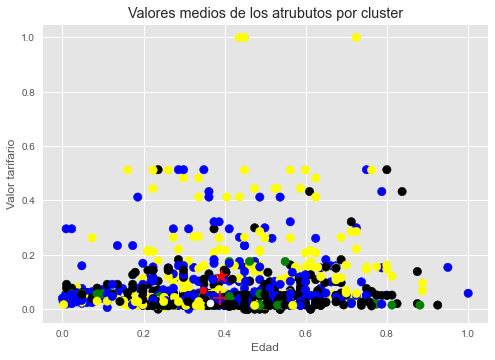

In [498]:
labels = km.predict(titanic_norm)

colores = ["blue","black","yellow","green"]

# for para crear la misma lista de labels pero en colores
asignar = []
for i in labels:
    asignar.append( colores[i] )

titanic_norm.columns = titanic.columns

plot.scatter(titanic_norm["Age"], titanic_norm["Passenger Fare"], c=asignar, s=70)

# agrego los centroides, de fare/age
plot.scatter( centros.iloc[0][2], centros.iloc[0][5], marker=".", c="red", s=200)
plot.scatter( centros.iloc[1][2], centros.iloc[1][5], marker="+", c="red", s=200)
plot.scatter( centros.iloc[2][2], centros.iloc[2][5], marker="*", c="red", s=200)
plot.scatter( centros.iloc[3][2], centros.iloc[3][5], marker=".", c="white", s=200)

plot.ylabel("Valor tarifario")
plot.xlabel("Edad")
plot.title("Valores medios de los atrubutos por cluster")
plot.show()


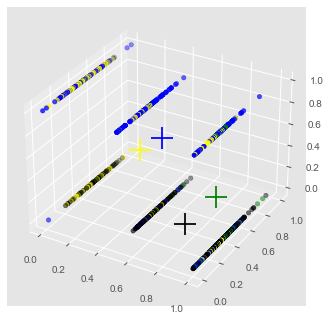

In [504]:
# graficando en 3d
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plot
from matplotlib import style

fig = plot.figure()
ax1 = fig.add_subplot(111,projection="3d")
ax1.scatter(titanic_norm["Passenger Class"], titanic_norm["Age"], titanic_norm["Survived"], c=asignar, marker="o")

#["blue","black","yellow","green"]
ax1.scatter( centros.iloc[0][0], centros.iloc[0][2], centros.iloc[0][6], marker="+", c=colores[0], s=500)
ax1.scatter( centros.iloc[1][0], centros.iloc[1][2], centros.iloc[1][6], marker="+", c=colores[1], s=500)
ax1.scatter( centros.iloc[2][0], centros.iloc[2][2], centros.iloc[2][6], marker="+", c=colores[2], s=500)
ax1.scatter( centros.iloc[3][0], centros.iloc[3][2], centros.iloc[3][6], marker="+", c=colores[3], s=500)



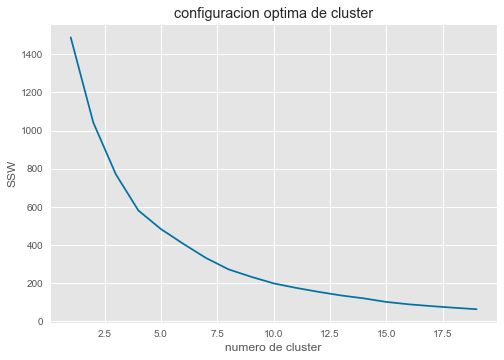

In [509]:
# Adicionalemnte queria probar sin considerar No of Siblings or Spouses on Board ni No of Parents or Children on Board
# ME PASO QUE CORRIENDO ASI, ALGUNAS VECES ME RECOMENDO 2 CLUSTER Y OTRAS VECES 4 CLUSTER

titanic_simple = titanic_norm.iloc[:,[0,1,2,5,6,7,8,9]]

SSW_simple = []

# para titanic normalizado
for c in range(1,MAX_K):
    km_c = KMeans(n_clusters=c, n_init=25).fit(titanic_simple)
    # distancia intercluster
    SSW_simple.append( km_c.inertia_ )


plot.plot( range(1,MAX_K), SSW_simple, "bx-" )
plot.xlabel("numero de cluster")
plot.ylabel("SSW")
plot.title("configuracion optima de cluster")
plot.style.use("ggplot")
plot.show()

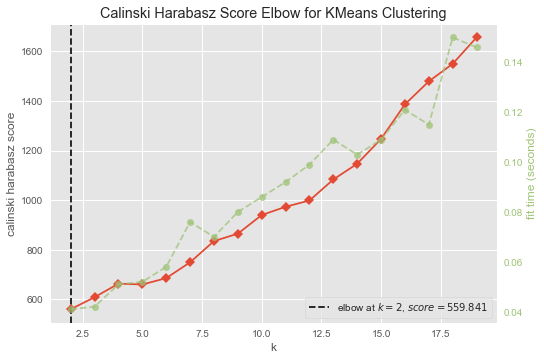

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [517]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,MAX_K), metric='calinski_harabasz', timings=True)

visualizer.fit(titanic_simple)
visualizer.show()